In this notebook:

1. [Connecting to the Twitter API](#1)
2. [Searching for a specific user](#2)
3. [Searching for a specific topic](#3)
4. [Extending the search and working with multi-level JSON Data](#4)

<a id="1"></a>
# 1. Connecting to the Twitter API

## Questions & Objectives

* Setting up access and validity signing
* Setting up a handler to manage the connection
* Running a test search

First we will download the libraries that deal with accessing the API (`tweepy`) and working with the JSON data (`json`).

In [1]:
# Run this cell now to import the libraries.

!pip install tweepy
import tweepy        # https://github.com/tweepy/tweepy
import json

     |████████████████████████████████| 62 kB 340 kB/s eta 0:00:011


We then set up the variables that hold the validation keys. You need to add your keys (tokens) and secrets in the spaces below. Make sure to put them between the speech marks and make sure there are no extra spaces.

In [3]:
# Add your keys and secrets and then run this cell.

access_key = '1444594707762491400-nQyEz2VHb86agzZ9EprDEziaqiDlVB'
access_secret = 'yPJLLNRkCXuEgxf0cJjKzO9zhDnGUPDP3yq1bcdW2a6Bq'
api_key = 'rMIe3li9R8JSp8BErscVgcvlM'
api_secret = 'wNz795MCrls3kreC8zY1nAer9db3FHAol7jWaqFKxQZf610nI4'

Next, we set up the authication handler. We pass the keys and secrets as below and then set up the API object. We can use this object to connect to the API.

In [4]:
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

To test the connection we will run a test query.

We use the API object and we are going to ask for some of the tweets from users you follow.


In [5]:
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

Fergus, as relentless as ever in his desire to help me prep for teaching https://t.co/BMAEMUIMc6
In advance of the new academic year I have decided to finally close all the open tabs. If I haven't been read/watch… https://t.co/C0PGC7bzsX
Trying times for Noodle.  Lacking cat skills she will never catch that bird. https://t.co/27pxdkZt8V
some sun on the bum https://t.co/GLD0wCV2vJ
RT @cesifoti: The academic circle of life 😂 https://t.co/9hm6EtNS03
RT @articonf: ARTICONF impressed the reviewers with their advancements in the 2nd year and passed the EC review yesterday. 

The project of…
RT @chazhutton: Today’s Comic: We are all, in our own little way, that ship. https://t.co/GVDjLxzErX
Spring is here! Another amazing winter of freezing sweary swims in the bag. https://t.co/YI8p1splVh
RT @MemeStudiesRN: Do you have a hot take about memes? A bone to pick with Elon Musk? A subgenre of memes that you think the world needs to…
RT @EdCDCS: Kicking off our workshop presented by @BostonJoan from

<a id="2"></a>
# 2. Searching for a Specific User

* Search for a specific user
* Retrieve data from the Twitter API
* Call specific items from the JSON data object
* Look at the full JSON data

We will now look for tweets from a specific person. To do this we need their Twitter name. If you go to https://twitter.com/BarackObama you can see the Twitter name under the main name. You can see it has an @ sign in front that we remove from our code.  

For this we use the `get_user` method from the Twitter API.

In [12]:
# First, we create a variable, call the information on the user Barack Obama, and hold it
# in the variable we created.

user = api.get_user(screen_name='BarackObama')

In [7]:
# This object is in JSON tuples.
# We can call the tuples and print their content. 
# We will look more at JSON later.
# We can print the screen name as below:

print(user.screen_name)

BarackObama


In [8]:
# We can print the number of followers:

print(user.followers_count)

130096417


In [9]:
# We can print the user description:

print(user.description)

Dad, husband, President, citizen.


In [10]:
# To see all of the user information in its raw format we can type:

print(user)

User(_api=<tweepy.api.API object at 0x7f69d0299520>, _json={'id': 813286, 'id_str': '813286', 'name': 'Barack Obama', 'screen_name': 'BarackObama', 'location': 'Washington, DC', 'profile_location': None, 'description': 'Dad, husband, President, citizen.', 'url': 'https://t.co/FPuJ0CENpo', 'entities': {'url': {'urls': [{'url': 'https://t.co/FPuJ0CENpo', 'expanded_url': 'http://obamabook.com', 'display_url': 'obamabook.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 130096417, 'friends_count': 588790, 'listed_count': 222607, 'created_at': 'Mon Mar 05 22:08:25 +0000 2007', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 16279, 'lang': None, 'status': {'created_at': 'Sun Oct 10 00:48:08 +0000 2021', 'id': 1447000963672428545, 'id_str': '1447000963672428545', 'text': 'I was deeply saddened to learn about the passing of General Ray Odierno after a battle with cancer. He d

### 🐛Minitask

* Try using the information from the user to print out to access the other information.
* See if you can work out how to get to the nested tuples.
* Try and look at another user.

In [15]:
# We can get tweets from the API user timeline.
# This time we call the user_timeline method again with the BarackObama user method.
# Here we call the last two tweets.
# These are retured in a list object.

new_tweets = api.user_timeline(screen_name = 'BarackObama', count = 2)   # replace BarackObama with another user's name

In [16]:
# Here we can tweet the first tweet (which remember is 0 in a list).
# What other information can you access from the tweets?  How about the number of retweets?

new_tweets[0]

Status(_api=<tweepy.api.API object at 0x7f69d0299520>, _json={'created_at': 'Sun Oct 10 00:48:08 +0000 2021', 'id': 1447000963672428545, 'id_str': '1447000963672428545', 'text': 'I was deeply saddened to learn about the passing of General Ray Odierno after a battle with cancer. He devoted his… https://t.co/m2Lr2GZaOb', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/m2Lr2GZaOb', 'expanded_url': 'https://twitter.com/i/web/status/1447000963672428545', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 813286, 'id_str': '813286', 'name': 'Barack Obama', 'screen_name': 'BarackObama', 'location': 'Washington, DC', 'description': 'Dad, husband, Pres

<a id="3"></a>
# 3. Searching for a Topic

* Search the Twitter API using a keyword
* Retrieve the text from a single tweet
* Retrieve the text from multiple tweets
* Process and clean the text
* Visualise the text

We will now look for tweets that contain a specific word. 

For this we use the `search` method from the Twitter API.

In [17]:
# Here we are looking for the word covid.
# We are asking for 10 english tweets to be returned.
# They are returned as a list.

covid_tweets = api.search_tweets(q='covid', lang='en', count='10')

In [18]:
# We can print out the first tweet in the list.

covid_tweets[0]

Status(_api=<tweepy.api.API object at 0x7f69d0299520>, _json={'created_at': 'Tue Oct 12 13:19:52 +0000 2021', 'id': 1447914918234238984, 'id_str': '1447914918234238984', 'text': 'RT @DonaldJTrumpJr: The fact that thousands of Southwest employees walked off the job protesting the COVID vaccine mandate forcing the airl…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'DonaldJTrumpJr', 'name': 'Donald Trump Jr.', 'id': 39344374, 'id_str': '39344374', 'indices': [3, 18]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1350506743743311872, 'id_str': '1350506743743311872', 'name': 'Laura', 'screen_name': 'Laura22320905', 'location': '', 'd

This time we can't just call the JSON from the object (like we did with the user object).
We have to deal with the JSON directly. We do this using the `_json` function.
Then we can call all of the tuples as a dictionary object. 

(Remember a tuple takes the form `['text':'this is tweet text']`, which means that we can retrieve the content of the tuple by the key of the tuple.) 

In [19]:
# Here we can see all of the json in a nice format...

covid_tweets[0]._json

{'created_at': 'Tue Oct 12 13:19:52 +0000 2021',
 'id': 1447914918234238984,
 'id_str': '1447914918234238984',
 'text': 'RT @DonaldJTrumpJr: The fact that thousands of Southwest employees walked off the job protesting the COVID vaccine mandate forcing the airl…',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'DonaldJTrumpJr',
    'name': 'Donald Trump Jr.',
    'id': 39344374,
    'id_str': '39344374',
    'indices': [3, 18]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1350506743743311872,
  'id_str': '1350506743743311872',
  'name': 'Laura',
  'screen_name': 'Laura22320905',
  'location': '',
  'description': "Ch

In [20]:
# ...or we can just call the text.

covid_tweets[0]._json['text'] 

'RT @DonaldJTrumpJr: The fact that thousands of Southwest employees walked off the job protesting the COVID vaccine mandate forcing the airl…'

In [24]:
# We can text put the text into its own list and just work with just the text.

tweets_text = []
for each in covid_tweets:
    tweets_text.append(each._json['text'])

In [25]:
# We can see how we have put the tweets' text into a list.

print(tweets_text)

['RT @DonaldJTrumpJr: The fact that thousands of Southwest employees walked off the job protesting the COVID vaccine mandate forcing the airl…', 'RT @JoWilliams52: Hey @RoyalMail @parcelforce do you want to have a word with your drivers about a little thing called Covid-19? Just had a…', 'RT @aaronhoyland: Refusing to get your shot because vaccinated people can still catch Covid is a lot like refusing to wear your seatbelt be…', 'RT @naledimashishi: People don’t want to get tested for Covid, don’t want to get vaccinated, don’t want to wear masks, don’t want to social…', 'RT @AgnesSolberg: "Big Pharma" makes a LOT more money from the meds you get during your ICU admission then a cheap #covid vaccine.', '@680NEWS @Jette680News @Cook680News The COVID vaccines were prepared by the CCP in a very deliberate manner long ag… https://t.co/ucMHpQg33j', 'RT @thedailybeast: The British government’s dithering in the crucial early weeks of the coronavirus pandemic ended up costing thousands of…', 'R

In [26]:
# We can treat the tweets' text like we did in earlier badges,
# for example, we can turn it into a string and tokenise it.

tweets_string = " ".join(tweets_text)
from nltk.tokenize import word_tokenize
tokens = word_tokenize(tweets_string)
print(tokens[0:10])

['RT', '@', 'DonaldJTrumpJr', ':', 'The', 'fact', 'that', 'thousands', 'of', 'Southwest']


In [27]:
# We can clean up the tweets' text like we did earlier, making it all lowercase and removing stop words.

import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
lowercase_tokens = [token.lower() for token in tokens]
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))
filtered_text = [token 
                 for token in lowercase_tokens 
                 if not token in remove_these]
print(filtered_text)

['rt', 'donaldjtrumpjr', 'fact', 'thousands', 'southwest', 'employees', 'walked', 'job', 'protesting', 'covid', 'vaccine', 'mandate', 'forcing', 'airl…', 'rt', 'jowilliams52', 'hey', 'royalmail', 'parcelforce', 'want', 'word', 'drivers', 'little', 'thing', 'called', 'covid-19', 'a…', 'rt', 'aaronhoyland', 'refusing', 'get', 'shot', 'vaccinated', 'people', 'still', 'catch', 'covid', 'lot', 'like', 'refusing', 'wear', 'seatbelt', 'be…', 'rt', 'naledimashishi', 'people', '’', 'want', 'get', 'tested', 'covid', '’', 'want', 'get', 'vaccinated', '’', 'want', 'wear', 'masks', '’', 'want', 'social…', 'rt', 'agnessolberg', '``', 'big', 'pharma', "''", 'makes', 'lot', 'money', 'meds', 'get', 'icu', 'admission', 'cheap', 'covid', 'vaccine', '680news', 'jette680news', 'cook680news', 'covid', 'vaccines', 'prepared', 'ccp', 'deliberate', 'manner', 'long', 'ag…', 'https', '//t.co/ucmhpqg33j', 'rt', 'thedailybeast', 'british', 'government', '’', 'dithering', 'crucial', 'early', 'weeks', 'coronavirus',

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# We can calculate word frequencies...

from collections import Counter
simple_frequencies_dict = Counter(filtered_text)


Counter({'rt': 9, 'covid-19': 6, 'get': 6, 'covid': 5, 'want': 5, '’': 5, 'vaccine': 3, 'vaccinated': 3, 'thousands': 2, 'refusing': 2, 'people': 2, 'lot': 2, 'wear': 2, '``': 2, "''": 2, 'https': 2, 'taiwan': 2, 'death': 2, 'deaths': 2, 'donaldjtrumpjr': 1, 'fact': 1, 'southwest': 1, 'employees': 1, 'walked': 1, 'job': 1, 'protesting': 1, 'mandate': 1, 'forcing': 1, 'airl…': 1, 'jowilliams52': 1, 'hey': 1, 'royalmail': 1, 'parcelforce': 1, 'word': 1, 'drivers': 1, 'little': 1, 'thing': 1, 'called': 1, 'a…': 1, 'aaronhoyland': 1, 'shot': 1, 'still': 1, 'catch': 1, 'like': 1, 'seatbelt': 1, 'be…': 1, 'naledimashishi': 1, 'tested': 1, 'masks': 1, 'social…': 1, 'agnessolberg': 1, 'big': 1, 'pharma': 1, 'makes': 1, 'money': 1, 'meds': 1, 'icu': 1, 'admission': 1, 'cheap': 1, '680news': 1, 'jette680news': 1, 'cook680news': 1, 'vaccines': 1, 'prepared': 1, 'ccp': 1, 'deliberate': 1, 'manner': 1, 'long': 1, 'ag…': 1, '//t.co/ucmhpqg33j': 1, 'thedailybeast': 1, 'british': 1, 'government': 1, '

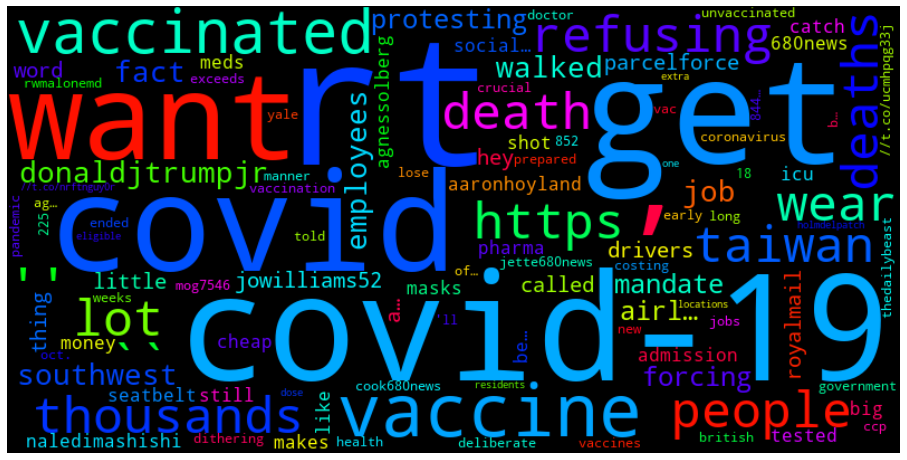

In [30]:
# ...and produce word clouds.

import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(width=800, 
                  height=400, 
                  max_font_size=160, 
                  colormap="hsv").generate_from_frequencies(simple_frequencies_dict)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 🐛Minitask

* Try using a visualisation method or a search method you have used before to visualise the text.
* Try searching for a different word.

In [ ]:
# Write your code here.

<a id="4"></a>
## 4. Extending the search and working with multi-level JSON Data

* Search the Twitter API using an extended query with multiple terms
* Search using a tweepy cursor to retrieve more data
* Look at nested data in the JSON

We will now look for tweets that contain several words. We can combine query words with the operator `OR`. We can use this operator to say, give me tweets that contain `word1` or `word2`. You might want to do this with related words on the same topic, or with multiple spellings or potential typos of a word. 

For this we will continue to use the `search` method from the Twitter API.

We want to gather more data than we did before. The `search` method limits the data we can retrieve. To extend the amount of data we retrieve we use a tweepy `Cursor`. Twitter returns multiple pages of data, almost like a book, but it will only give you one page at a time. Before, we only took the first page. This time, we will page through the extended version using a `Cursor` object. The `Cursor` maintains the connection with the API and allows us to ask for the next page.

In [2]:
# We set up a list to hold the tweets so we can then append to it as we iterate through the pages.
# Previously, we created a list in the search, but here we need to create a list so we can add to it.

covid_tweets = []

# We set up a tweepy Cursor to maintain the connection.
# We set up the query with the OR operator.
# We iterate through the pages from the API using a for loop.
# We append the content to a list.
for page in tweepy.Cursor(api.search_tweets, 
                          q='covid OR covid19 OR COVID OR COVID19 or #covid', 
                          lang='en').pages(10):
    covid_tweets.append(page)

NameError: name 'tweepy' is not defined

In [35]:
covid_tweets[0]

[Status(_api=None, _json={'created_at': 'Tue Oct 12 13:51:53 +0000 2021', 'id': 1447922978495385600, 'id_str': '1447922978495385600', 'text': 'RT @wqbelle: To mask, or not to mask, that should not be a question.\n\nhttps://t.co/Sa4xEjK9wp\n\nI have to shake my head at all the protests…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'wqbelle', 'name': 'William Quincy Belle', 'id': 157050864, 'id_str': '157050864', 'indices': [3, 11]}], 'urls': [{'url': 'https://t.co/Sa4xEjK9wp', 'expanded_url': 'https://www.williamquincybelle.com/2021/09/masks-how-we-hate-change.html', 'display_url': 'williamquincybelle.com/2021/09/masks-…', 'indices': [70, 93]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to

In [36]:
# We can see the text from the first tweet:

print(covid_tweets[0][0].text) # covid_tweets[0][0] is the first Status (tweet) object

RT @wqbelle: To mask, or not to mask, that should not be a question.

https://t.co/Sa4xEjK9wp

I have to shake my head at all the protests…


Twitter data is nested.

This means that it can contain items within items. 

For example hashtags, user mentions, and URLs are contained within an `entities` dictionary.

This looks like:

```
'entities': { 
    'hashtags': [{'hashtag1'}, {'hashtag2'}], 
    'user_mentions': [{'screen_name':'barackobama', 'name': 'Barack Obama'}], 
    'urls': [{'url':'www.bbc.co.uk'}]
    }
```

In [1]:
# The hashtags are contained in a list within the entity tuple,
# which means we need to call the entity tuple (hashtag) and then iterate through the list.
# We set up a list to hold the hashtags so we can then append to it as we iterate.
# We iterate through each tweet, and then through the hashtags in the list,
# adding the tweets to the list.

covid_hashtags = []
for search_result in covid_tweets:
    for status in search_result:  # for every tweet
        hashtags = status.entities['hashtags']
        if len(hashtags) > 0:     # if there are hashtags
            for h in hashtags:
                covid_hashtags.append(h['text'])

print(covid_hashtags)

NameError: name 'covid_tweets' is not defined

In [ ]:
# We can then visualise these hashtags in the ways we learnt before.

hashtag_string = " ".join(covid_hashtags)
tokens = word_tokenize(hashtag_string)
simple_frequencies_dict_covid = Counter(tokens)
cloud = WordCloud(width=800, height=400, max_font_size=160, 
                  colormap="viridis", 
                  background_color='white',).generate_from_frequencies(simple_frequencies_dict_covid)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 🐛Minitask

* Try creating a visualisation with a different nested item.

In [ ]:
# # Have this as a task -- look for another item of interest, maybe alter to be URLs?

# covid_mentions = []
# for search_result in covid_tweets:
#     for status in search_result:
#         mention = status._json['entities']['user_mentions']
#         if len(mention) > 0:
#             i = 0
#             while i < len(mention):
#                 covid_mentions.append(mention[i]['name'])
#                 i += 1
# people_dict=Counter(covid_mentions)

In [ ]:
# cloud = WordCloud(width=800, height=400, max_font_size=200,
#                   background_color='white', colormap="viridis").generate_from_frequencies(people_dict)
# plt.figure(figsize=(16,12))
# plt.imshow(cloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [ ]:
# covid_tweets = []
# for page in tweepy.Cursor(api.search, q='brexit', lang='en', min_retweets="1000").pages(100):
#     covid_tweets.append(page)

In [ ]:
# print(len(covid_tweets))
# print(covid_tweets[0])